---
<center>

# Enfriamiento taza de cafe
$\displaystyle\frac{dT}{dt}=k(T-T_a)$

$T(0)=90$
</center>





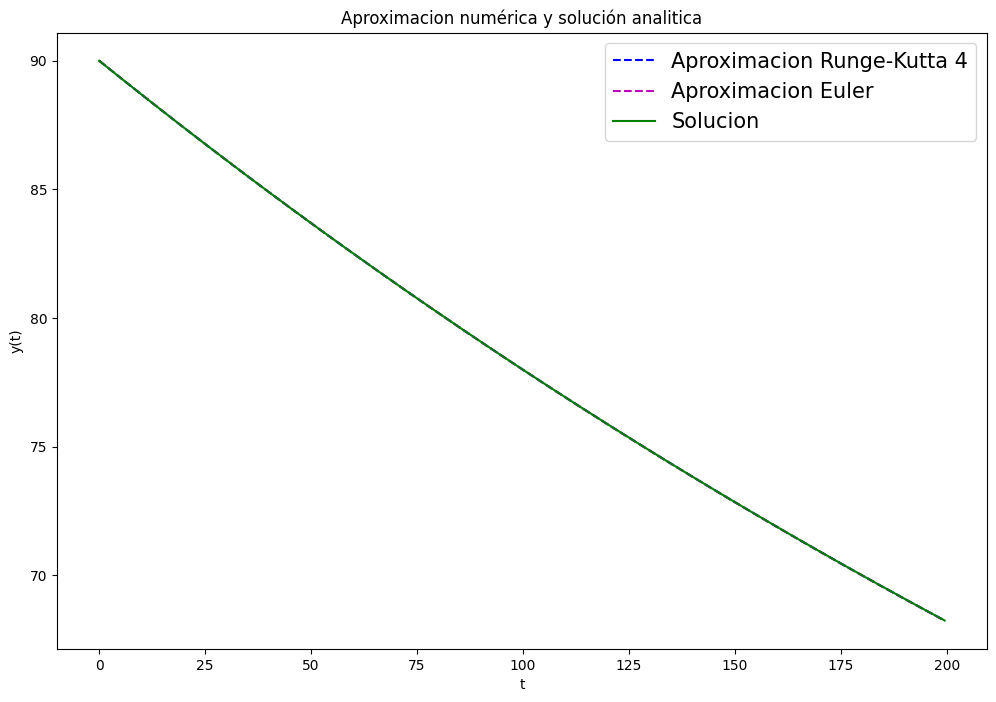

In [ ]:
#PRACTIA 1
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 200
N = 2
h = 1/N
t = np.arange(a, b, h)

#Aproximacion
w = np.zeros(len(t))
q = np.zeros(len(t))

#Ec. diferencial
TA = 25 #temperatura ambiental
Ta = 90 #temperatura inicial
Tb = 75 #temperatura final
alpha = 65
K = -0.002043
f = lambda t, w: K*(w - TA)

#Solucion analitica
T = lambda t: TA + alpha*np.exp(K*t)
S = T(t)

#Metodo de Euler
q[0] = Ta
for k in range(len(t)-1):
   q[k+1] = q[k] + h*f(t[k], q[k])

#MetodoRunge-Kutta
k = np.zeros(4)
w[0] = Ta
for j in range(len(t)-1):
    k[0] = h*f(t[j], w[j])
    k[1] = h*f(t[j] + h/2, w[j] + k[0]/2)
    k[2] = h*f(t[j] + h/2, w[j] + k[1]/2)
    k[3] = h*f(t[j+1], w[j] + k[2])
    w[j+1] = w[j] + (1/6)*(k[0] + 2*k[1] + 2*k[2] + k[3])

#Error
E1 = np.absolute(S-q)
E2 = np.absolute(S-w)

#Grafica
plt.figure(figsize = (12,8))
plt.title("Aproximacion numérica y solución analitica")
plt.xlabel("t")
plt.ylabel("y(t)")

plt.plot(t, w, "b--", label="Aproximacion Runge-Kutta 4")
plt.plot(t, q, "m--", label="Aproximacion Euler")
plt.plot(t, S, 'g-', label="Solucion")
plt.legend(loc="upper right", fontsize=15)

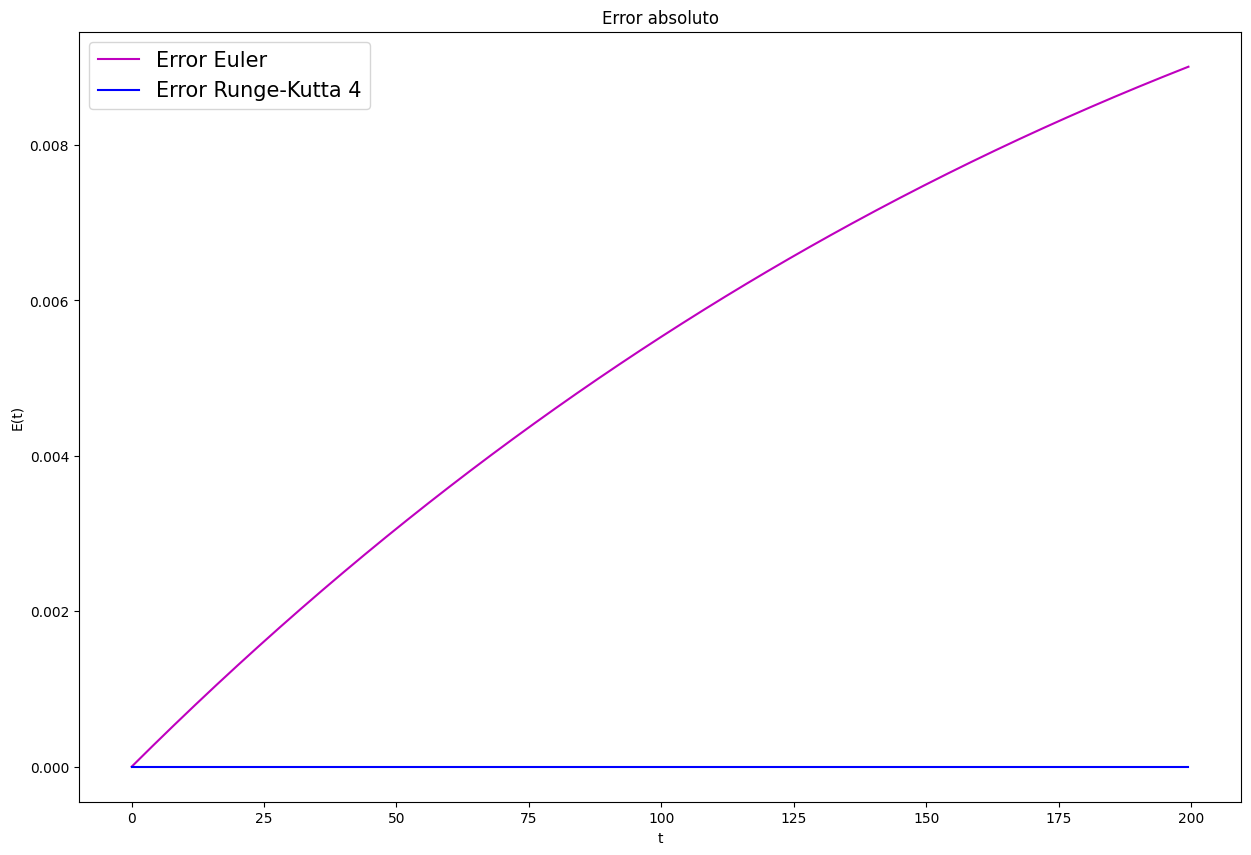

In [ ]:
#Grafica del error
plt.figure(figsize=(15,10))
plt.title("Error absoluto")
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t, E1, 'm', label="Error Euler")
plt.plot(t, E2,'b', label="Error Runge-Kutta 4")
plt.legend(loc="upper left", fontsize=15)

---
<center>

#Péndulo
$\theta''(t)+\frac{g}{L}\sin(\theta(t))=0$

$\theta(0)=\frac{\pi}{6},\:\theta'(0)=0$

</center>




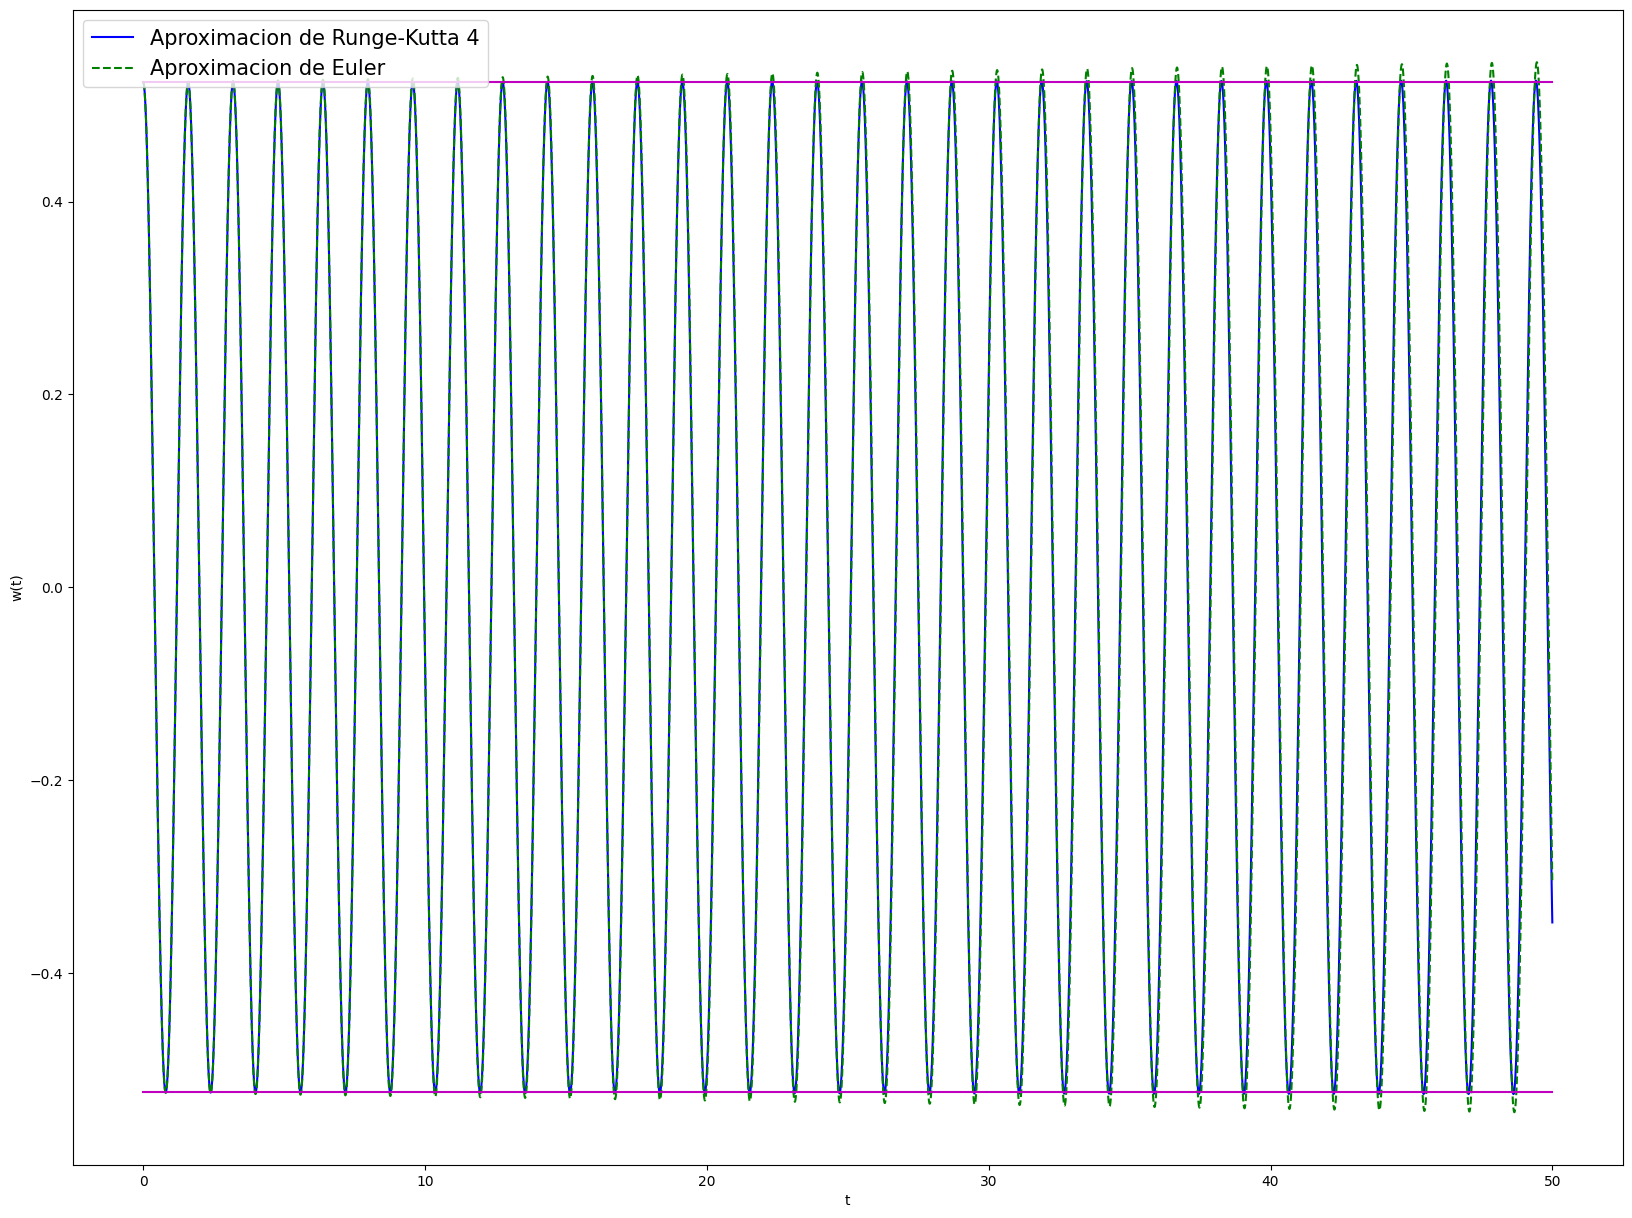

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 50
N = 10000
h = 1/N
t = np.arange(a, b, h)
g = 9.81
L = 0.61
s = np.zeros(len(t))
d = np.zeros(len(t))

#Aproximacion
w = np.zeros(len(t)) #para u(t)
x = np.zeros(len(t)) #para v(t)
p = np.zeros(len(t)) #para u(t)
q = np.zeros(len(t)) #para v(t)

#EDOs
u0 = np.pi/6
v0 = 0
f1 = lambda t, w, x: x
f2 = lambda t, w, x: -(g/L)*(np.sin(w))

#Metodo Euler
p[0] = u0
q[0] = v0
for j in range(len(t)-1):
      p[j+1] = p[j] + h*f1(t[j],p[j],q[j])
      q[j+1] = q[j] + h*f2(t[j],p[j],q[j])

#Metodo Runge-Kutta 4
w[0] = u0
x[0] = v0
k = np.zeros(4)
c = np.zeros(4)
for j in range(len(t)-1):
    k[0] = h*f1(t[j], w[j], x[j])
    c[0] = h*f2(t[j], w[j], x[j])
    k[1] = h*f1(t[j] + h/2, w[j] + k[0]/2, x[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, w[j] + k[0]/2, x[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, w[j] + k[1]/2, x[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, w[j] + k[1]/2, x[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, w[j] + k[2]/2, x[j] + c[2]/2)
    c[3] = h*f2(t[j+1], w[j] + k[2], x[j] + c[2])

    w[j+1] = w[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    x[j+1] = x[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

#Error
E = np.absolute(p-w)

#Grafica
plt.figure(figsize = (20,15))
plt.xlabel("t")
plt.ylabel("w(t)")

plt.plot(t, w, "b", label="Aproximacion de Runge-Kutta 4")
plt.plot(t, p, "g--", label="Aproximacion de Euler")
plt.plot([a,b], [u0,u0], "-m")
plt.plot([a,b], [-u0,-u0], "-m")
plt.legend(loc="upper left",fontsize=15)

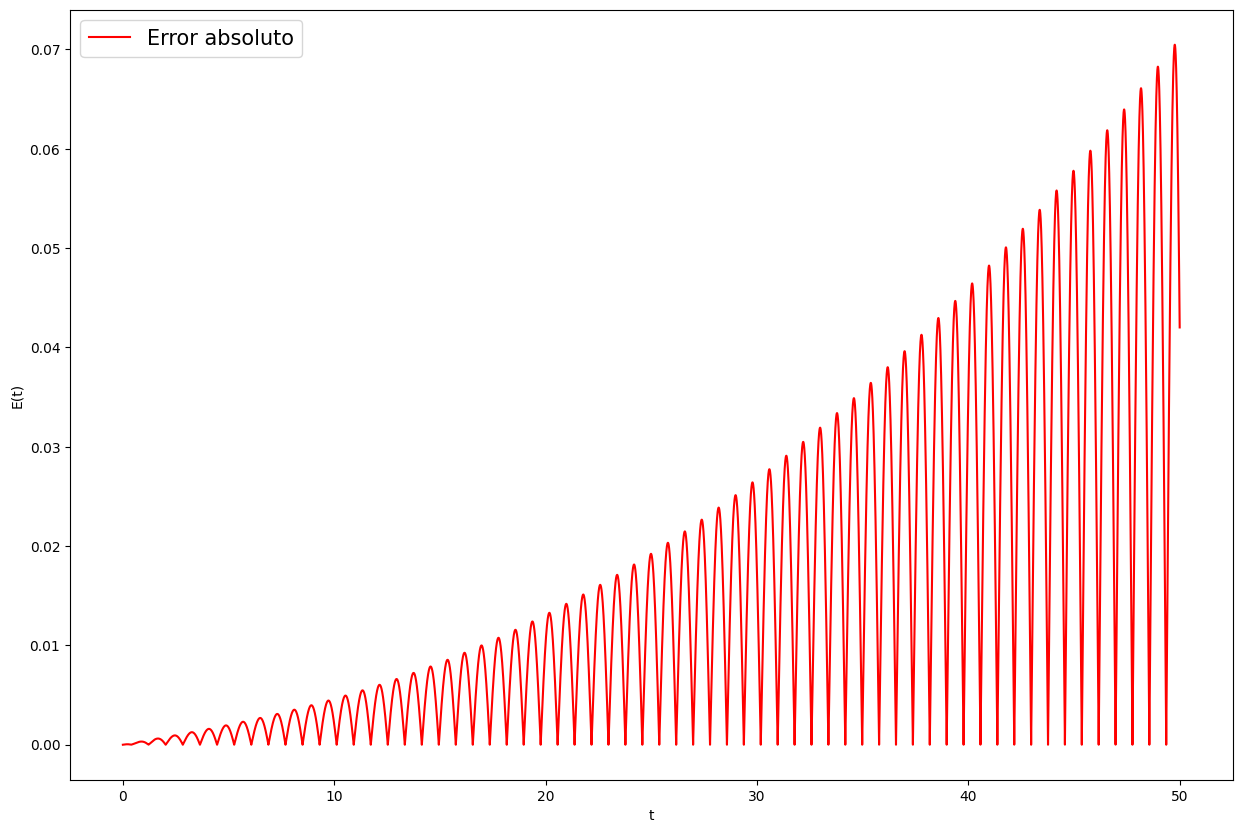

In [ ]:
#Grafica del error
plt.figure(figsize=(15,10))
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t, E,"r", label="Error absoluto")
plt.legend(loc="upper left",fontsize=15)

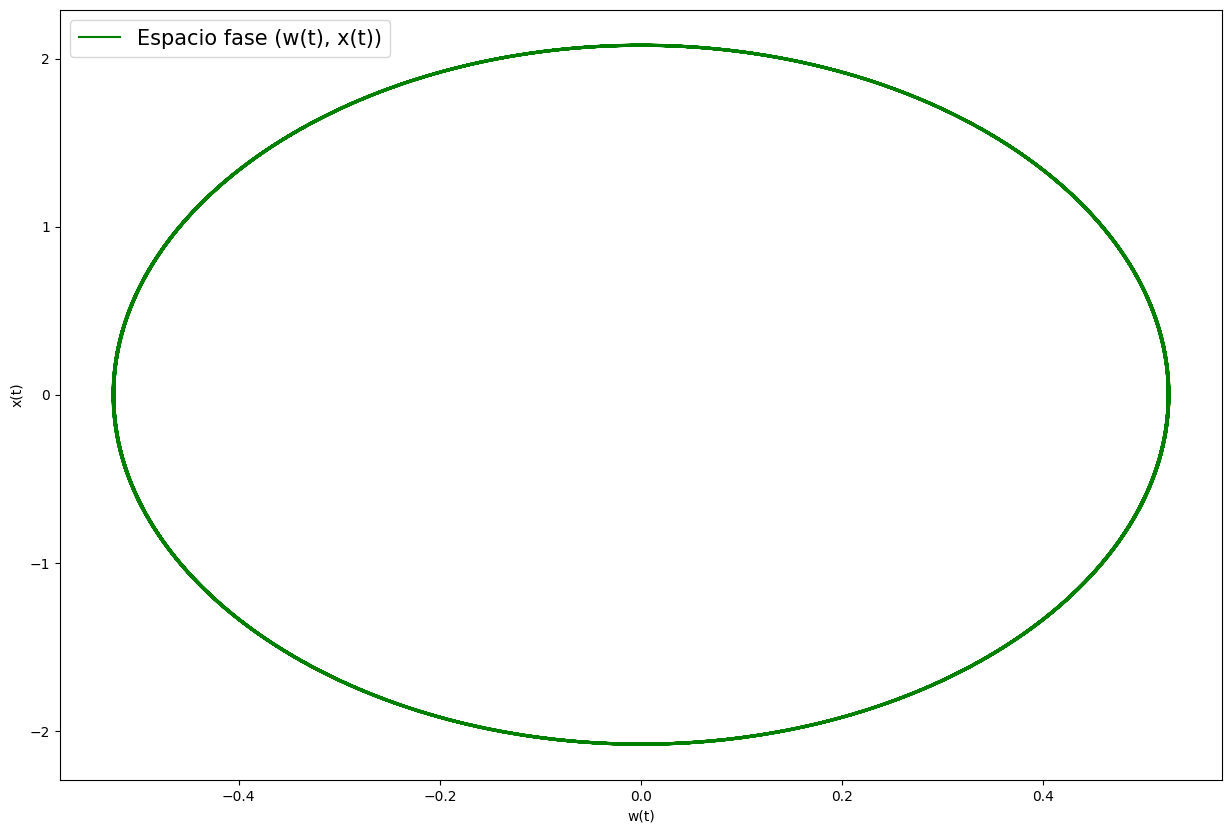

In [ ]:
#Grafica espacio fase
plt.figure(figsize = (15,10))
plt.xlabel("w(t)")
plt.ylabel("x(t)")
plt.plot(w,x,"g-", label= "Espacio fase (w(t), x(t))")
plt.legend(loc="upper left",fontsize=15)

---
<center>

#Modelo modificado depredador-presa
$R'=2R(1-\frac{R}{2})-1.2RF$

$F'=-F+0.9RF$
</center>


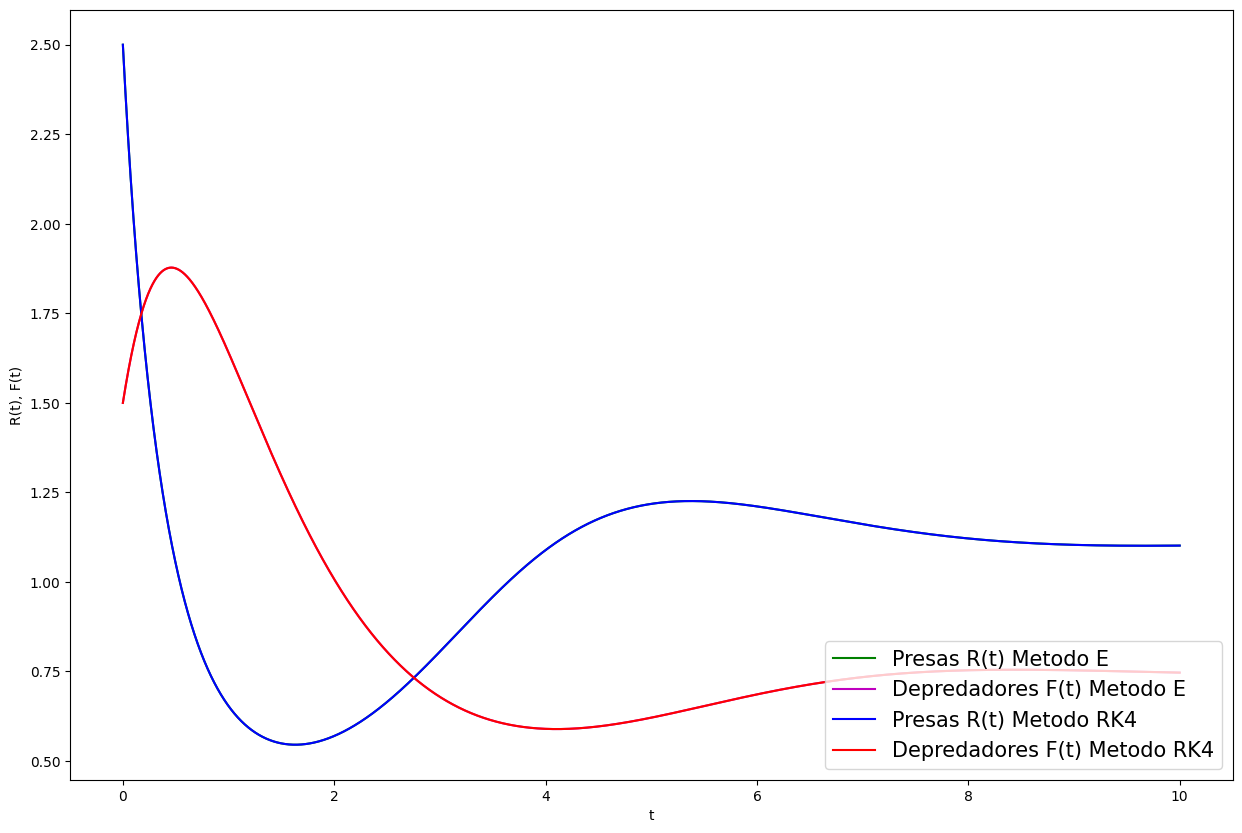

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 10
N = 10000
h = 1/N
t = np.arange(a, b, h)

#Puntos de equilibrio
A = [0, 0]
B = [2, 0]
C = [10/9, 20/27]

#Aproximacion
R1 = np.zeros(len(t)) #para F(t)
F1 = np.zeros(len(t)) #para R(t)

R2 = np.zeros(len(t)) #para F(t)
F2 = np.zeros(len(t)) #para R(t)

R3 = np.zeros(len(t)) #para F(t)
F3 = np.zeros(len(t)) #para R(t)

R4 = np.zeros(len(t)) #para F(t)
F4 = np.zeros(len(t)) #para R(t)

RR1 = np.zeros(len(t)) #para F(t)
FF1 = np.zeros(len(t)) #para R(t)

RR2 = np.zeros(len(t)) #para F(t)
FF2 = np.zeros(len(t)) #para R(t)

RR3 = np.zeros(len(t)) #para F(t)
FF3 = np.zeros(len(t)) #para R(t)

RR4 = np.zeros(len(t)) #para F(t)
FF4 = np.zeros(len(t)) #para R(t)

#EDOs
R0 = np.array([10/9, 2.5, 2.5, 0.1]) #Diferentes condiciones iniciales
F0 = np.array([20/27, 1.5, 0.5, 0.5]) #Diferentes condiciones iniciales
f1 = lambda t, R, F: 2*R*(1 - R/2) + -1.2*R*F
f2 = lambda t, R, F: -1*F + 0.9*R*F

#Metodo Euler
RR1[0] = R0[0] #Diferentes condiciones iniciales
FF1[0] = F0[0] #Diferentes condiciones iniciales
for j in range(len(t)-1):
       RR1[j+1] = RR1[j] + h*f1(t[j],RR1[j],FF1[j])
       FF1[j+1] = FF1[j] + h*f2(t[j],RR1[j],FF1[j])

RR2[0] = R0[1]
FF2[0] = F0[1]
for j in range(len(t)-1):
       RR2[j+1] = RR2[j] + h*f1(t[j],RR2[j],FF2[j])
       FF2[j+1] = FF2[j] + h*f2(t[j],RR2[j],FF2[j])

RR3[0] = R0[2]
FF3[0] = F0[2]
for j in range(len(t)-1):
       RR3[j+1] = RR3[j] + h*f1(t[j],RR3[j],FF3[j])
       FF3[j+1] = FF3[j] + h*f2(t[j],RR3[j],FF3[j])

RR4[0] = R0[3]
FF4[0] = F0[3]
for j in range(len(t)-1):
       RR4[j+1] = RR4[j] + h*f1(t[j],RR4[j],FF4[j])
       FF4[j+1] = FF4[j] + h*f2(t[j],RR4[j],FF4[j])

#Metodo Runge-Kutta 4
R1[0] = R0[0] #Diferentes condiciones iniciales
F1[0] = F0[0] #Diferentes condiciones iniciales
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R1[j], F1[j])
    c[0] = h*f2(t[j], R1[j], F1[j])
    k[1] = h*f1(t[j] + h/2, R1[j] + k[0]/2, F1[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R1[j] + k[0]/2, F1[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R1[j] + k[1]/2, F1[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R1[j] + k[1]/2, F1[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R1[j] + k[2]/2, F1[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R1[j] + k[2], F1[j] + c[2])

    R1[j+1] = R1[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F1[j+1] = F1[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R2[0] = R0[1]
F2[0] = F0[1]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R2[j], F2[j])
    c[0] = h*f2(t[j], R2[j], F2[j])
    k[1] = h*f1(t[j] + h/2, R2[j] + k[0]/2, F2[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R2[j] + k[0]/2, F2[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R2[j] + k[1]/2, F2[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R2[j] + k[1]/2, F2[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R2[j] + k[2]/2, F2[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R2[j] + k[2], F2[j] + c[2])

    R2[j+1] = R2[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F2[j+1] = F2[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R3[0] = R0[2]
F3[0] = F0[2]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R3[j], F3[j])
    c[0] = h*f2(t[j], R3[j], F3[j])
    k[1] = h*f1(t[j] + h/2, R3[j] + k[0]/2, F3[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R3[j] + k[0]/2, F3[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R3[j] + k[1]/2, F3[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R3[j] + k[1]/2, F3[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R3[j] + k[2]/2, F3[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R3[j] + k[2], F3[j] + c[2])

    R3[j+1] = R3[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F3[j+1] = F3[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R4[0] = R0[3]
F4[0] = F0[3]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R4[j], F4[j])
    c[0] = h*f2(t[j], R4[j], F4[j])
    k[1] = h*f1(t[j] + h/2, R4[j] + k[0]/2, F4[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R4[j] + k[0]/2, F4[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R4[j] + k[1]/2, F4[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R4[j] + k[1]/2, F4[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R4[j] + k[2]/2, F4[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R4[j] + k[2], F4[j] + c[2])

    R4[j+1] = R4[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F4[j+1] = F4[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

#Grafica
plt.figure(figsize = (15,10))
plt.xlabel("t")
plt.ylabel("R(t), F(t)")

plt.plot(t, RR2, "g-", label="Presas R(t) Metodo E")
plt.plot(t, FF2, "m-", label="Depredadores F(t) Metodo E")
plt.plot(t, R2, "b-", label="Presas R(t) Metodo RK4")
plt.plot(t, F2, "r-", label="Depredadores F(t) Metodo RK4")
plt.legend(loc="lower right",fontsize=15)


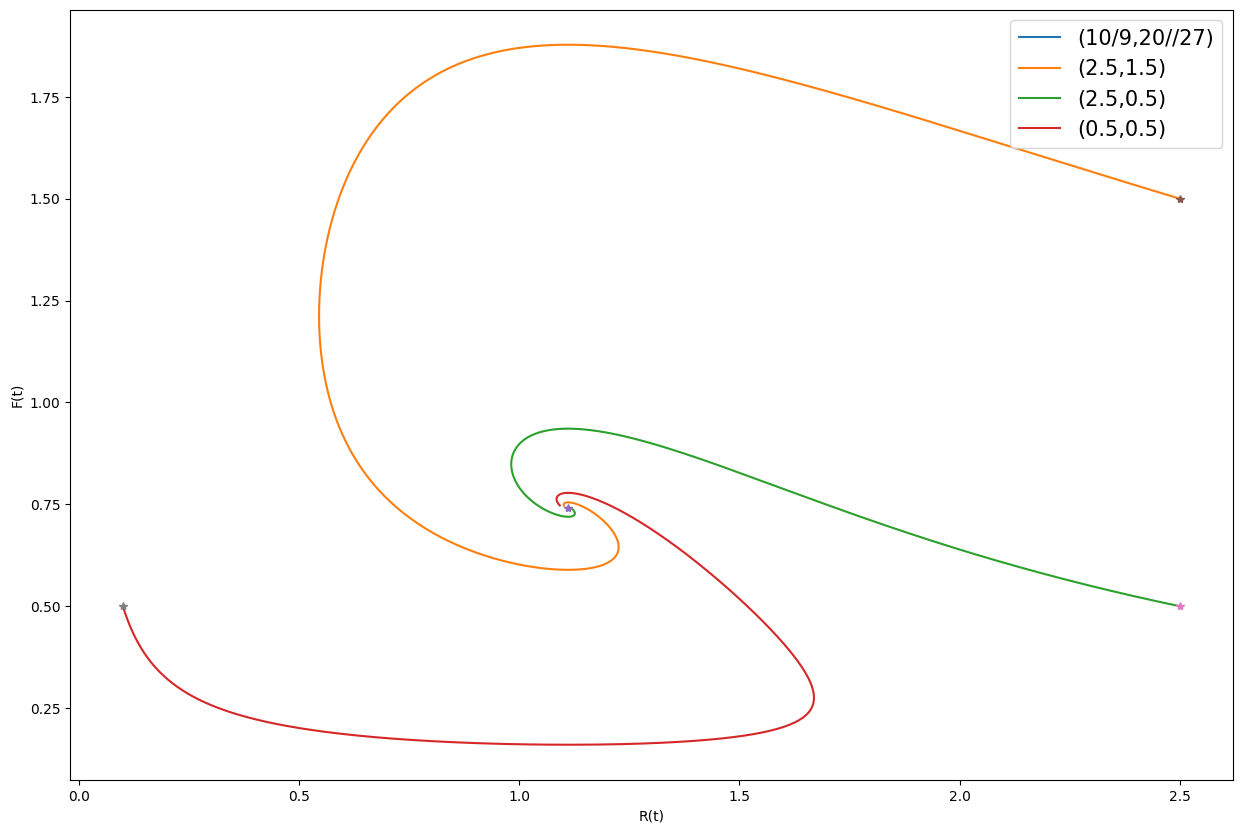

In [ ]:
#Grafica espacio fase
plt.figure(figsize = (15,10))
plt.xlabel("R(t)")
plt.ylabel("F(t)")

plt.plot(RR1,FF1,label="(10/9,20//27)")
plt.plot(RR2,FF2,label="(2.5,1.5)")
plt.plot(RR3,FF3,label="(2.5,0.5)")
plt.plot(RR4,FF4,label="(0.5,0.5)")
plt.plot(R0[0],F0[0],"*",R0[1],F0[1],"*",R0[2],F0[2],"*",R0[3],F0[3],"*")
plt.legend(loc="upper right",fontsize=15)

---
<center>

#Modelo depredador-presa
$R'=2R-1.2RF$

$F'=-F+0.9RF$
</center>


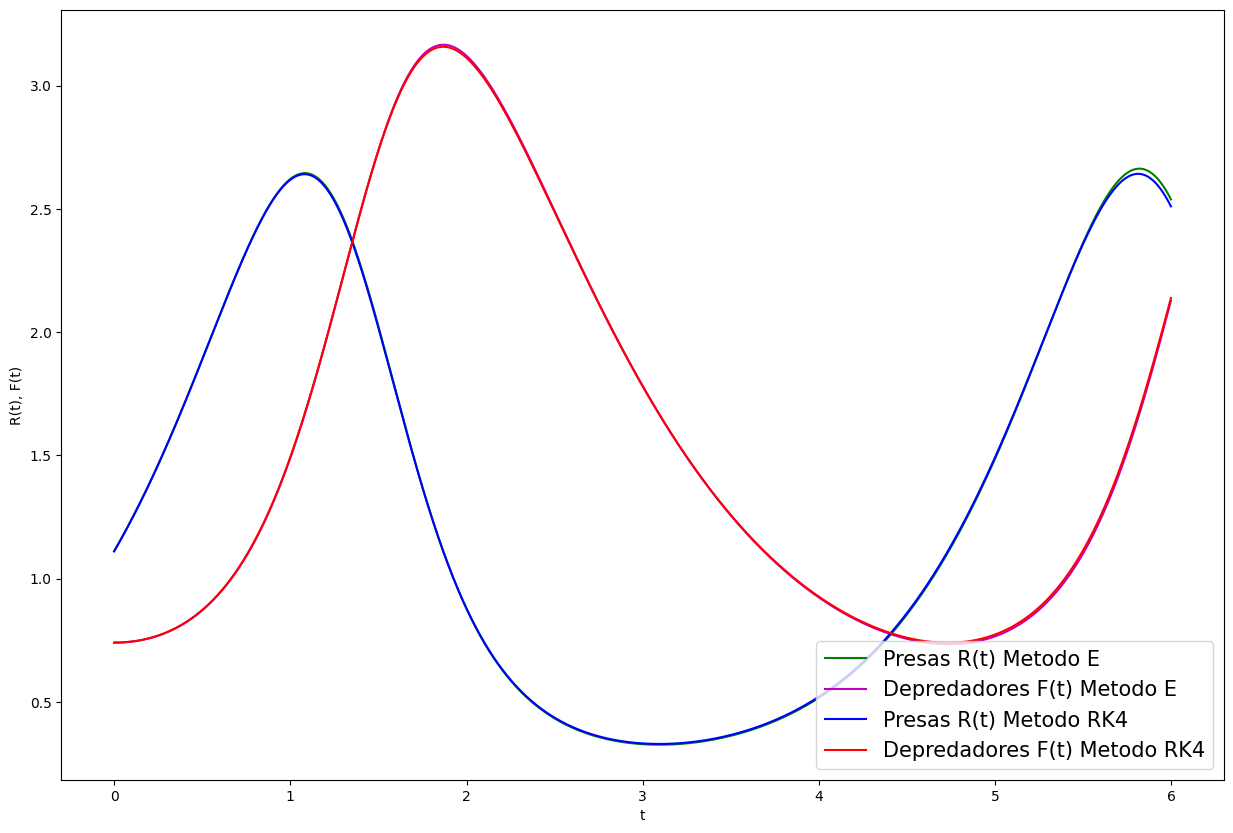

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 6
N = 500
h = 1/N
t = np.arange(a, b, h)
A = [0, 0]
B = [10/9, 5/3]

#Aproximacion
R1 = np.zeros(len(t)) #para F(t)
F1 = np.zeros(len(t)) #para R(t)

R2 = np.zeros(len(t)) #para F(t)
F2 = np.zeros(len(t)) #para R(t)

R3 = np.zeros(len(t)) #para F(t)
F3 = np.zeros(len(t)) #para R(t)

R4 = np.zeros(len(t)) #para F(t)
F4 = np.zeros(len(t)) #para R(t)

RR1 = np.zeros(len(t)) #para F(t)
FF1 = np.zeros(len(t)) #para R(t)

RR2 = np.zeros(len(t)) #para F(t)
FF2 = np.zeros(len(t)) #para R(t)

RR3 = np.zeros(len(t)) #para F(t)
FF3 = np.zeros(len(t)) #para R(t)

RR4 = np.zeros(len(t)) #para F(t)
FF4 = np.zeros(len(t)) #para R(t)

#EDOs
R0 = np.array([10/9, 2.5, 2.5, 0.1]) #Diferentes condiciones iniciales
F0 = np.array([20/27, 1.5, 0.5, 0.5]) #Diferentes condiciones iniciales
f1 = lambda t, R, F: 2*R + -1.2*(R*F)
f2 = lambda t, R, F: -1*F + 0.9*(R*F)

#Metodo Euler
RR1[0] = R0[0] #Diferentes condiciones iniciales
FF1[0] = F0[0] #Diferentes condiciones iniciales
for j in range(len(t)-1):
       RR1[j+1] = RR1[j] + h*f1(t[j],RR1[j],FF1[j])
       FF1[j+1] = FF1[j] + h*f2(t[j],RR1[j],FF1[j])

RR2[0] = R0[1]
FF2[0] = F0[1]
for j in range(len(t)-1):
       RR2[j+1] = RR2[j] + h*f1(t[j],RR2[j],FF2[j])
       FF2[j+1] = FF2[j] + h*f2(t[j],RR2[j],FF2[j])

RR3[0] = R0[2]
FF3[0] = F0[2]
for j in range(len(t)-1):
       RR3[j+1] = RR3[j] + h*f1(t[j],RR3[j],FF3[j])
       FF3[j+1] = FF3[j] + h*f2(t[j],RR3[j],FF3[j])

RR4[0] = R0[3]
FF4[0] = F0[3]
for j in range(len(t)-1):
       RR4[j+1] = RR4[j] + h*f1(t[j],RR4[j],FF4[j])
       FF4[j+1] = FF4[j] + h*f2(t[j],RR4[j],FF4[j])

#Metodo Runge-Kutta 4
R1[0] = R0[0] #Diferentes condiciones iniciales
F1[0] = F0[0] #Diferentes condiciones iniciales
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R1[j], F1[j])
    c[0] = h*f2(t[j], R1[j], F1[j])
    k[1] = h*f1(t[j] + h/2, R1[j] + k[0]/2, F1[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R1[j] + k[0]/2, F1[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R1[j] + k[1]/2, F1[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R1[j] + k[1]/2, F1[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R1[j] + k[2]/2, F1[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R1[j] + k[2], F1[j] + c[2])

    R1[j+1] = R1[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F1[j+1] = F1[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R2[0] = R0[1]
F2[0] = F0[1]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R2[j], F2[j])
    c[0] = h*f2(t[j], R2[j], F2[j])
    k[1] = h*f1(t[j] + h/2, R2[j] + k[0]/2, F2[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R2[j] + k[0]/2, F2[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R2[j] + k[1]/2, F2[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R2[j] + k[1]/2, F2[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R2[j] + k[2]/2, F2[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R2[j] + k[2], F2[j] + c[2])

    R2[j+1] = R2[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F2[j+1] = F2[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R3[0] = R0[2]
F3[0] = F0[2]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R3[j], F3[j])
    c[0] = h*f2(t[j], R3[j], F3[j])
    k[1] = h*f1(t[j] + h/2, R3[j] + k[0]/2, F3[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R3[j] + k[0]/2, F3[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R3[j] + k[1]/2, F3[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R3[j] + k[1]/2, F3[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R3[j] + k[2]/2, F3[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R3[j] + k[2], F3[j] + c[2])

    R3[j+1] = R3[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F3[j+1] = F3[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

R4[0] = R0[3]
F4[0] = F0[3]
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], R4[j], F4[j])
    c[0] = h*f2(t[j], R4[j], F4[j])
    k[1] = h*f1(t[j] + h/2, R4[j] + k[0]/2, F4[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, R4[j] + k[0]/2, F4[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, R4[j] + k[1]/2, F4[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, R4[j] + k[1]/2, F4[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, R4[j] + k[2]/2, F4[j] + c[2]/2)
    c[3] = h*f2(t[j+1], R4[j] + k[2], F4[j] + c[2])

    R4[j+1] = R4[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    F4[j+1] = F4[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

#Grafica
plt.figure(figsize = (15,10))
plt.xlabel("t")
plt.ylabel("R(t), F(t)")

plt.plot(t, RR1, "g-", label="Presas R(t) Metodo E")
plt.plot(t, FF1, "m-", label="Depredadores F(t) Metodo E")
plt.plot(t, R1, "b", label="Presas R(t) Metodo RK4")
plt.plot(t, F1, "r", label="Depredadores F(t) Metodo RK4")
plt.legend(loc="lower right",fontsize=15)

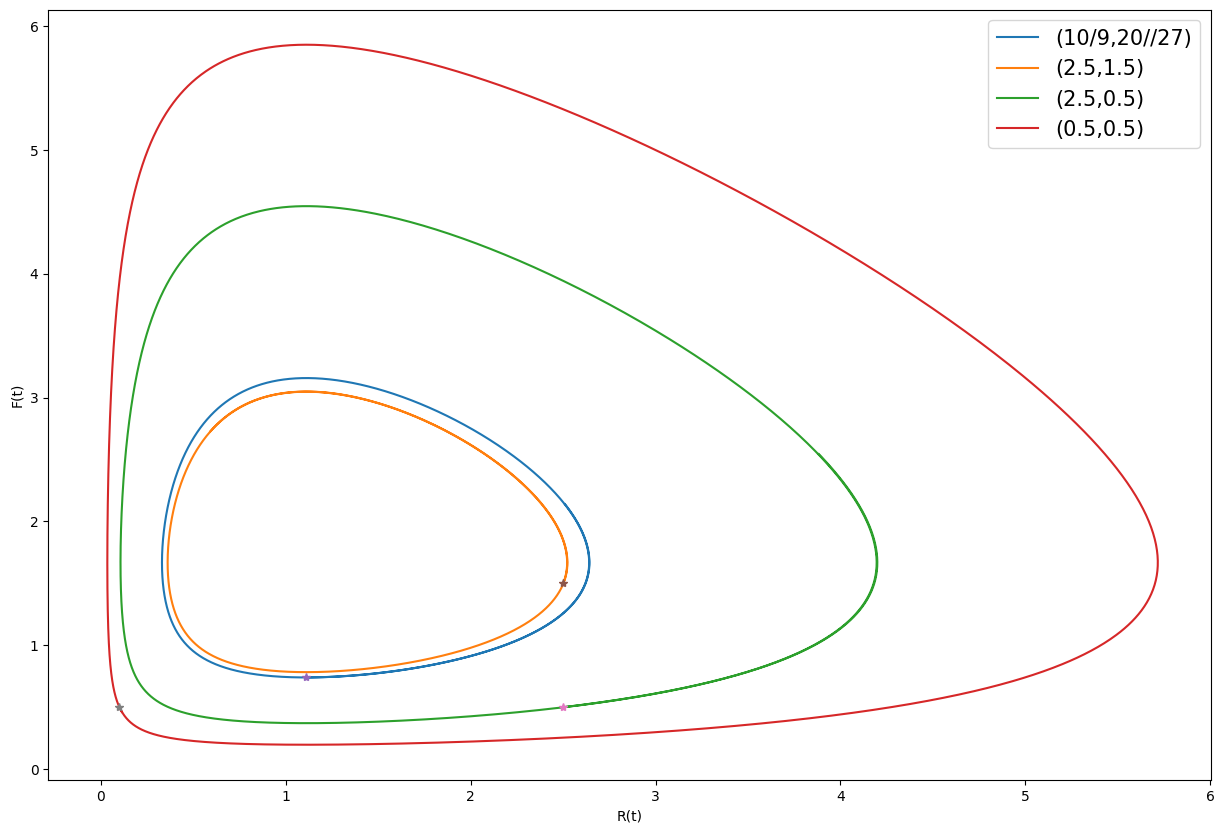

In [ ]:
#Grafica espacio fase
plt.figure(figsize = (15,10))
plt.xlabel("R(t)")
plt.ylabel("F(t)")

plt.plot(R1,F1,label="(10/9,20//27)")
plt.plot(R2,F2,label="(2.5,1.5)")
plt.plot(R3,F3,label="(2.5,0.5)")
plt.plot(R4,F4,label="(0.5,0.5)")
plt.plot(R0[0],F0[0],"*",R0[1],F0[1],"*",R0[2],F0[2],"*",R0[3],F0[3],"*",[2])
plt.legend(loc="upper right",fontsize=15)

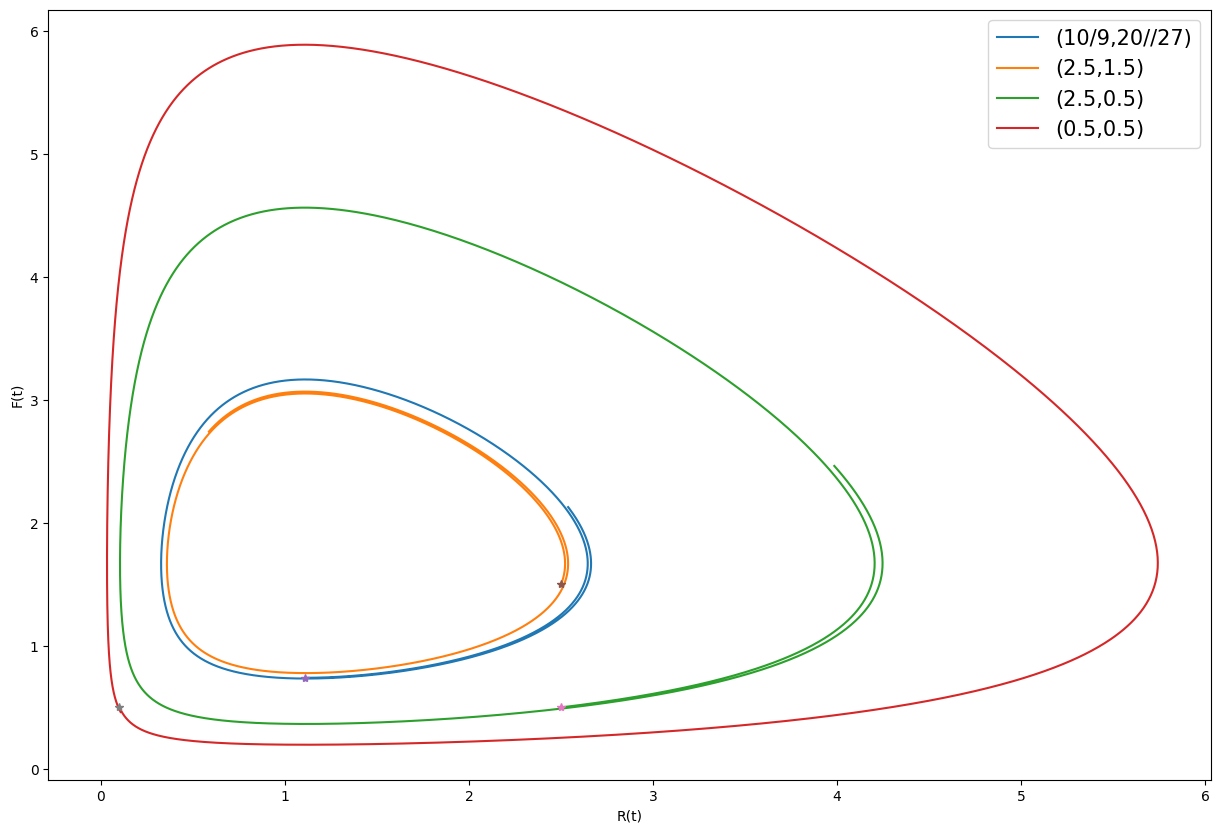

In [ ]:
#Grafica espacio fase \Euler
plt.figure(figsize = (15,10))
plt.xlabel("R(t)")
plt.ylabel("F(t)")

plt.plot(RR1,FF1,label="(10/9,20//27)")
plt.plot(RR2,FF2,label="(2.5,1.5)")
plt.plot(RR3,FF3,label="(2.5,0.5)")
plt.plot(RR4,FF4,label="(0.5,0.5)")
plt.plot(R0[0],F0[0],"*",R0[1],F0[1],"*",R0[2],F0[2],"*",R0[3],F0[3],"*",[2])
plt.legend(loc="upper right",fontsize=15)

---
<center>

#Ecuacion de Van Der Pol
$x''(t)-(1-x^2(t))x'(t)+x(t)=0$

$x(0)=1,\:x'(0)=1$
</center>

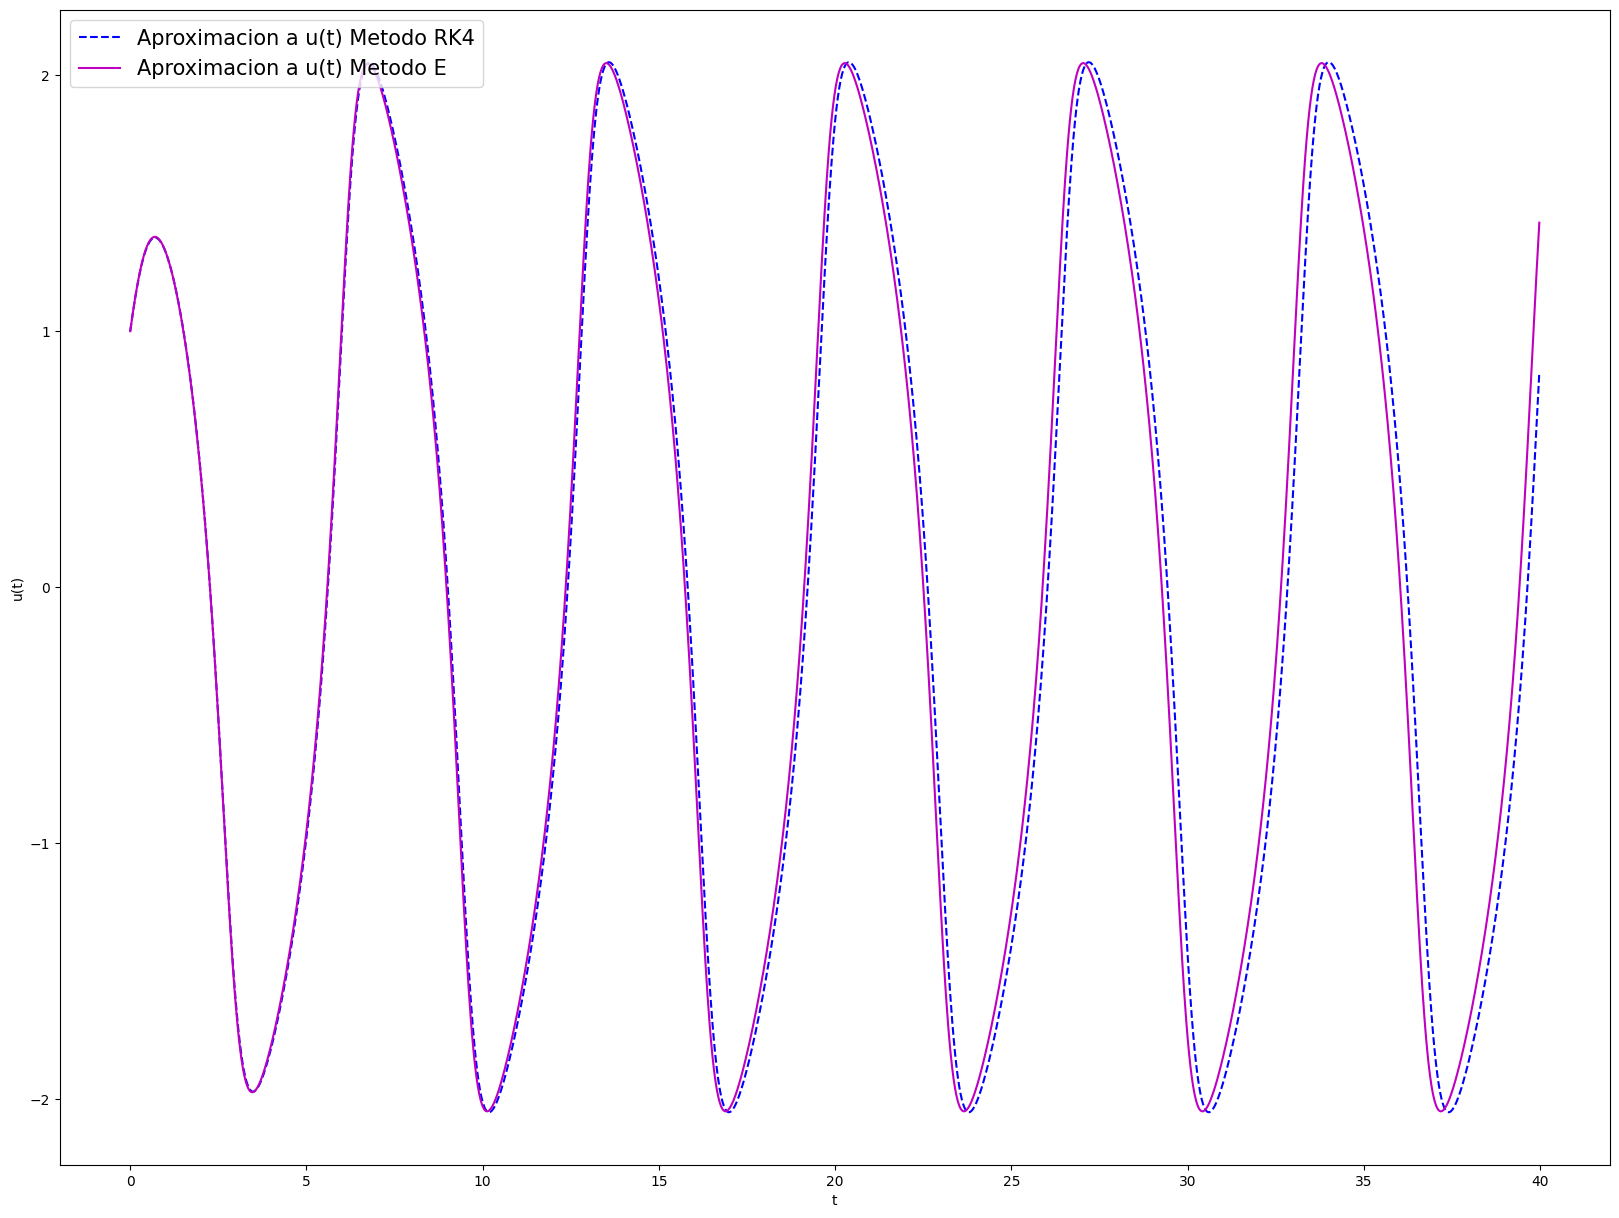

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 40
N = 50
h = 1/N
t = np.arange(a,b,h)

#Aproximaciones
u = np.zeros(len(t))
v = np.zeros(len(t))
uu = np.zeros(len(t))
vv = np.zeros(len(t))

#EDOs
f1 = lambda t, u, v: v
f2 = lambda t, u, v: (1 - u**2)*v - u
u0 = 1
v0 = 1

#Metodo Euler
uu[0] = u0
vv[0] = v0
for j in range(0,len(t)-1):
       uu[j+1] = uu[j] + h*f1(t[j],uu[j],vv[j])
       vv[j+1] = vv[j] + h*f2(t[j],uu[j],vv[j])

#Metodo Runge-Kutta 4
u[0] = u0
v[0] = v0
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], u[j], v[j])
    c[0] = h*f2(t[j], u[j], v[j])
    k[1] = h*f1(t[j] + h/2, u[j] + c[0]/2, v[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, u[j] + c[0]/2, v[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, u[j] + c[1]/2, v[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, u[j] + c[1]/2, v[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, u[j] + c[2]/2, v[j] + c[2]/2)
    c[3] = h*f2(t[j+1], u[j] + k[2], v[j] + c[2])

    u[j+1] = u[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    v[j+1] = v[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

#Error
E = np.absolute(u - uu)

#Grafica
plt.figure(figsize = (20,15))
plt.xlabel("t")
plt.ylabel("u(t)")

plt.plot(t, u, "b--", label="Aproximacion a u(t) Metodo RK4")
plt.plot(t, uu, "m", label="Aproximacion a u(t) Metodo E")
plt.legend(loc="upper left",fontsize=15)

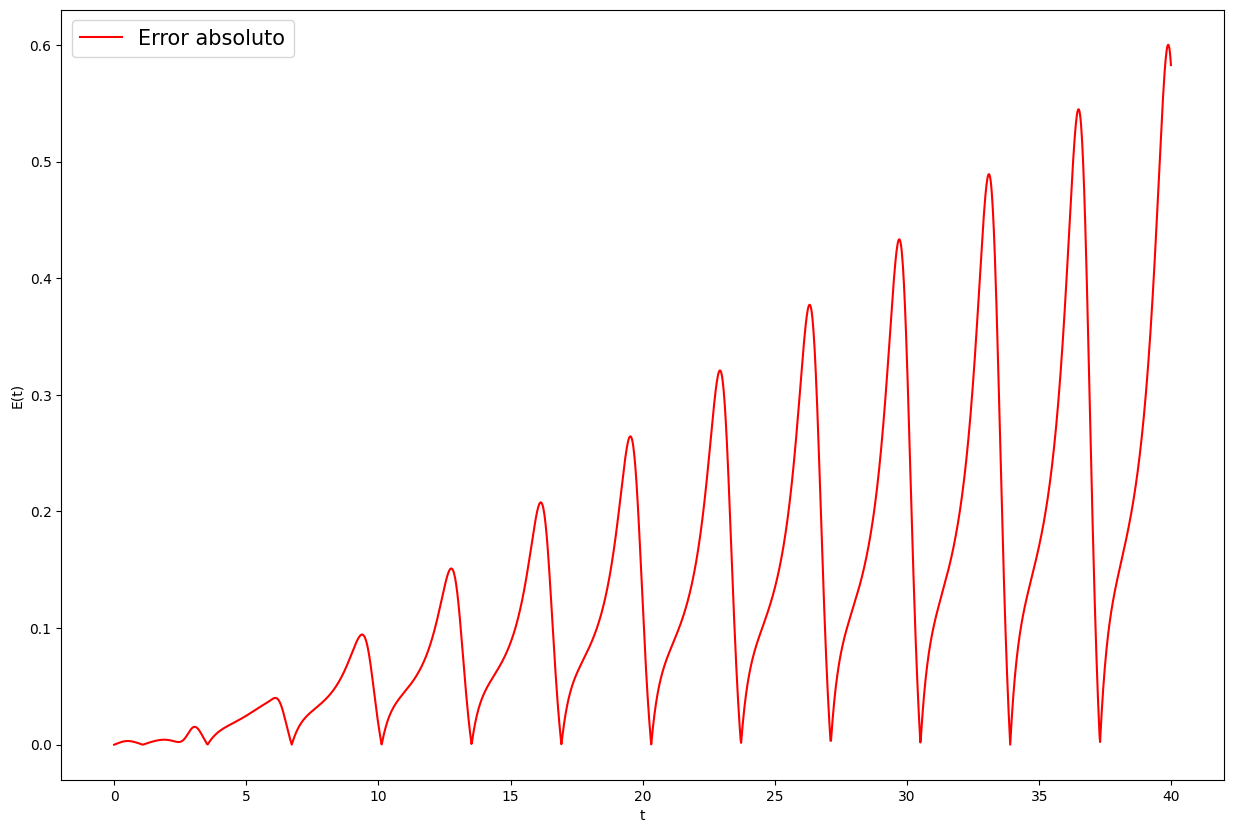

In [ ]:
#Grafica del error
plt.figure(figsize=(15,10))
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t, E, "r", label="Error absoluto")
plt.legend(loc="upper left",fontsize=15)

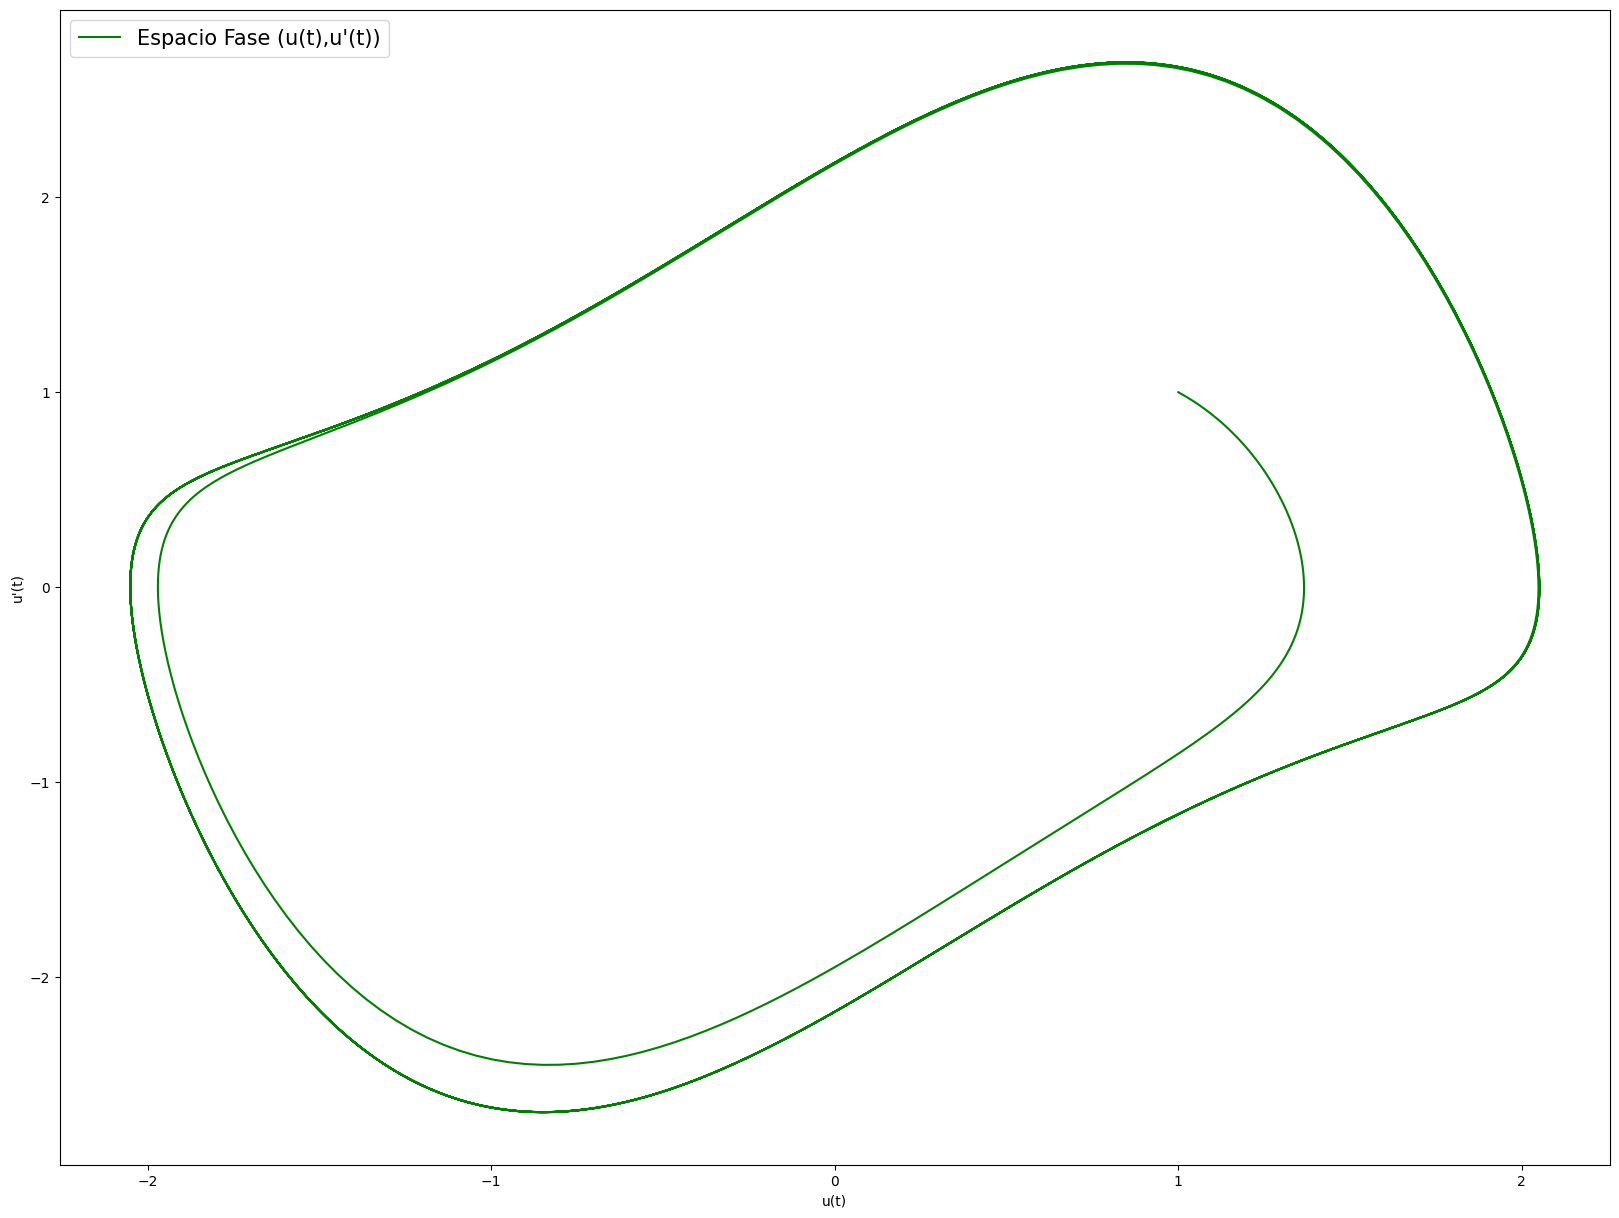

In [ ]:
#Grafica espacio fase
plt.figure(figsize = (20,15))
plt.xlabel("u(t)")
plt.ylabel("u'(t)")
plt.plot(u,v, "g", label="Espacio Fase (u(t),u'(t))")
plt.legend(loc="upper left",fontsize=15)

---
<center>

#Oscilador Armónico amortiguado
$y''+7y'+10y=0$

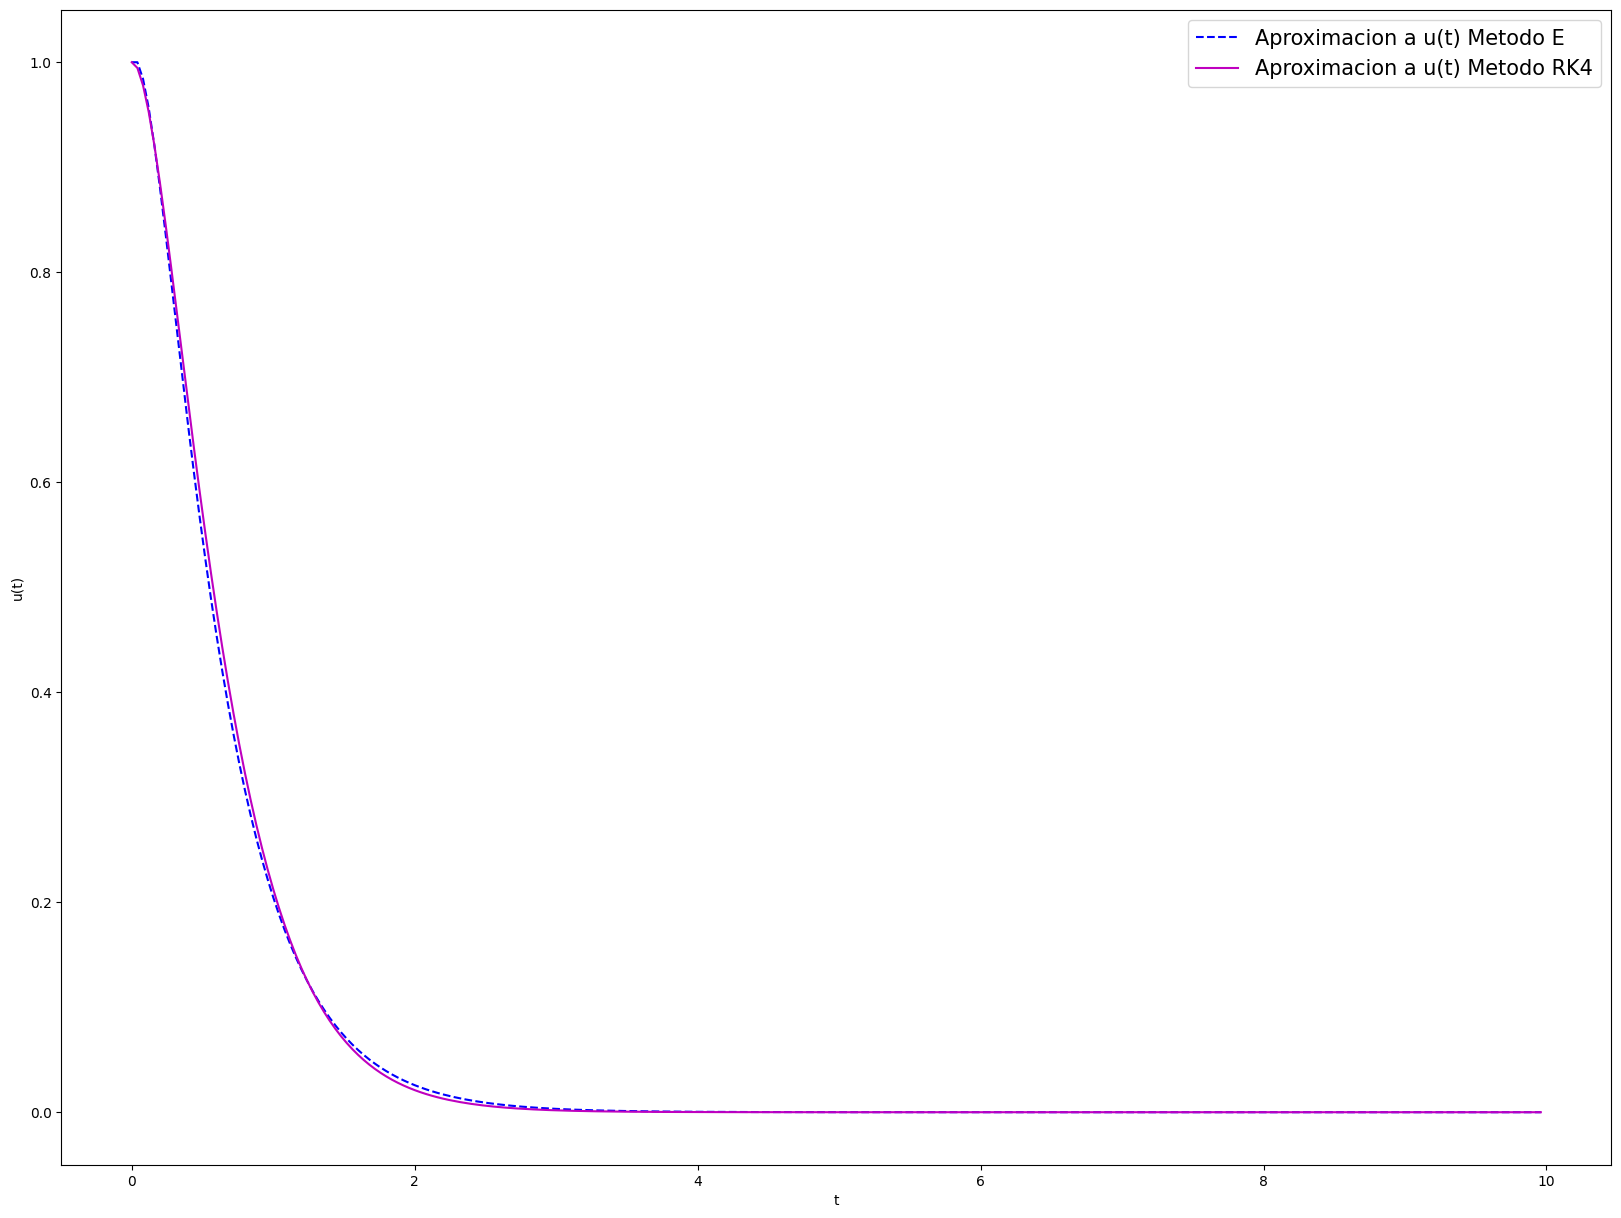

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parametros
a = 0
b = 10
N = 25
h = 1/N
t = np.arange(a,b,h)

#Aproximaciones
u = np.zeros(len(t))
v = np.zeros(len(t))
uu = np.zeros(len(t))
vv = np.zeros(len(t))

#EDOs
f1 = lambda t, u, v: v
f2 = lambda t, u, v: - 7*v - 10*u
u0 = 1
v0 = 0

#Metodo Euler
uu[0] = u0
vv[0] = v0
for j in range(0,len(t)-1):
     uu[j+1] = uu[j] + h*f1(t[j],uu[j],vv[j])
     vv[j+1] = vv[j] + h*f2(t[j],uu[j],vv[j])

#Metodo Runge-Kutta 4
u[0] = u0
v[0] = v0
k = np.zeros(4)
c = np.zeros(4)
for j in range(0, len(t)-1):
    k[0] = h*f1(t[j], u[j], v[j])
    c[0] = h*f2(t[j], u[j], v[j])
    k[1] = h*f1(t[j] + h/2, u[j] + c[0]/2, v[j] + c[0]/2)
    c[1] = h*f2(t[j] + h/2, u[j] + c[0]/2, v[j] + c[0]/2)
    k[2] = h*f1(t[j] + h/2, u[j] + c[1]/2, v[j] + c[1]/2)
    c[2] = h*f2(t[j] + h/2, u[j] + c[1]/2, v[j] + c[1]/2)
    k[3] = h*f1(t[j] + h/2, u[j] + c[2]/2, v[j] + c[2]/2)
    c[3] = h*f2(t[j+1], u[j] + k[2], v[j] + c[2])

    u[j+1] = u[j] + (1/6)*(k[0] + 2*k[1] + 2* k[2] + k[3])
    v[j+1] = v[j] + (1/6)*(c[0] + 2*c[1] + 2* c[2] + c[3])

#Error
E = np.absolute(u - uu)

#Grafica
plt.figure(figsize = (20,15))
plt.xlabel("t")
plt.ylabel("u(t)")

plt.plot(t, uu, "b--", label="Aproximacion a u(t) Metodo E")
plt.plot(t, u, "m", label="Aproximacion a u(t) Metodo RK4")
plt.legend(loc="upper right",fontsize=15)

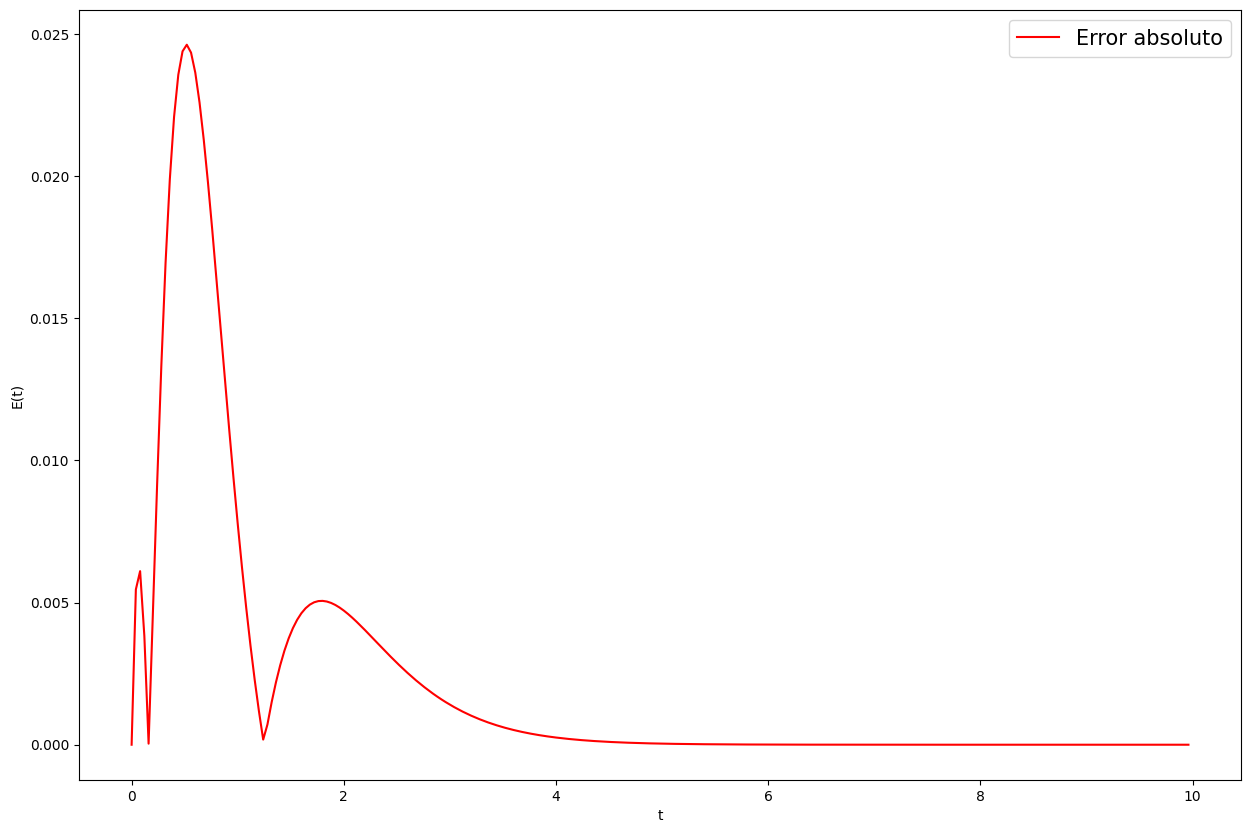

In [ ]:
#Grafica del error
plt.figure(figsize=(15,10))
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t, E, "r", label="Error absoluto")
plt.legend(loc="upper right",fontsize=15)

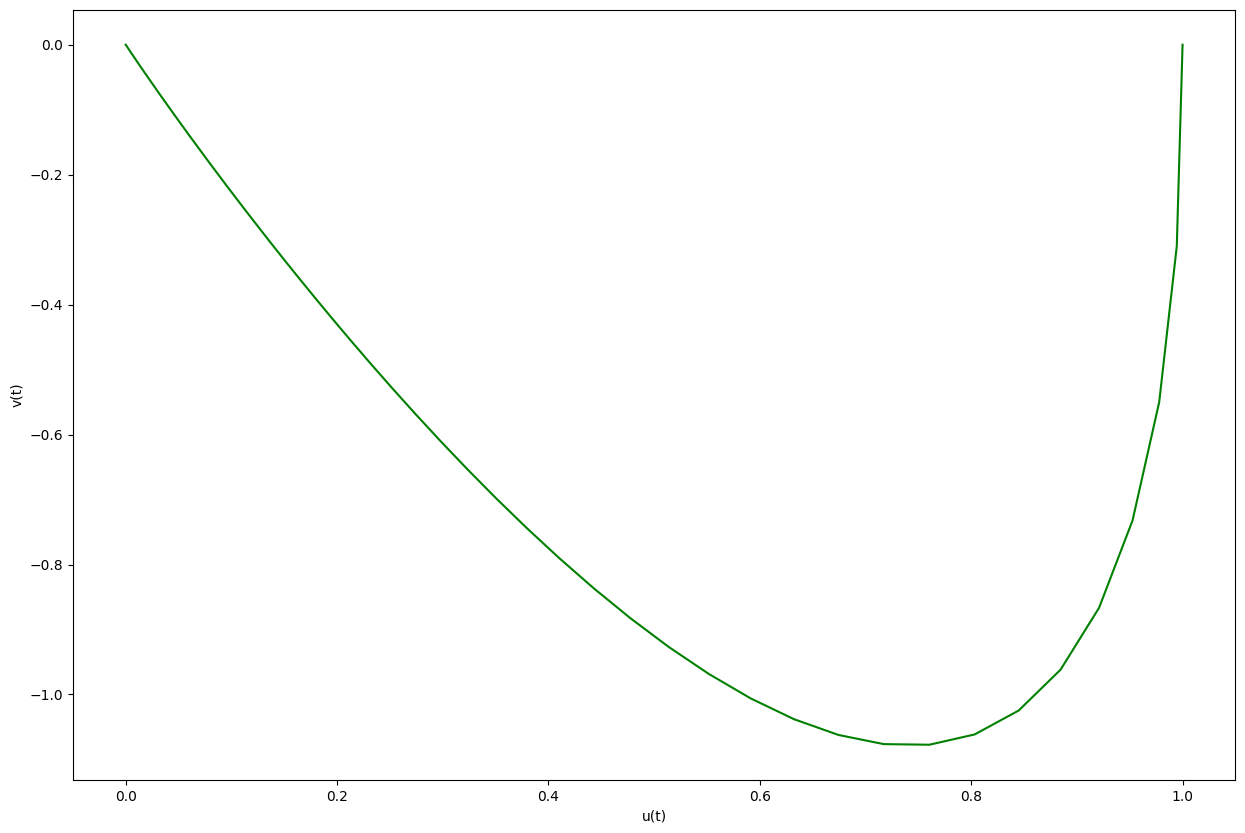

In [ ]:
#Grafica espacio fase
plt.figure(figsize = (15,10))
plt.xlabel("u(t)")
plt.ylabel("v(t)")
plt.plot(u,v,"g-")